In [251]:
from PIL import Image
import numpy as np

In [375]:
lut = Image.open("/Users/vzhavoronkov/Downloads/LUT-square8.png")

In [376]:
data = list(lut.getdata())

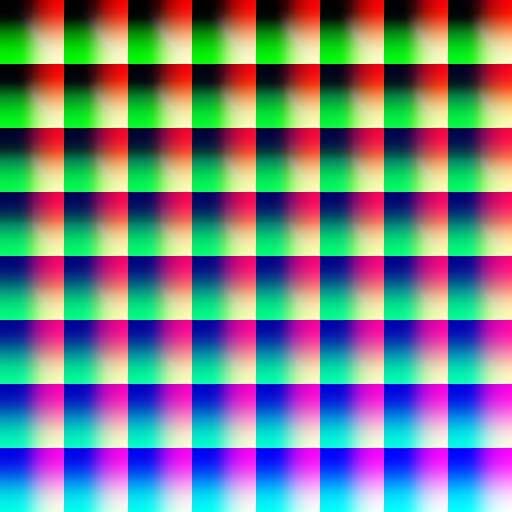

In [377]:
reshaped = np.array(data, dtype='uint8').reshape((512, 512, 3))
Image.fromarray(reshaped)

In [378]:
transformed = [(0, 0, 0) for d in data]

width = 512
pixelsInRow = 64
rowsInBlock = 64
blocksInROW = 8
for rowIndex in range(64 * 8 * 8):
    baseRow = rowIndex * pixelsInRow
    row = data[baseRow:(baseRow + pixelsInRow)]
    rowsInROW = int(blocksInROW * rowsInBlock)
    (x, y) = (rowIndex % blocksInROW, int(rowIndex / rowsInROW))
    yInBlock = int((rowIndex - int(y * rowsInROW)) / blocksInROW)
    base_transformed = (y * rowsInROW + x * pixelsInRow + yInBlock) * pixelsInRow
    transformed[base_transformed:(base_transformed + pixelsInRow)] = row


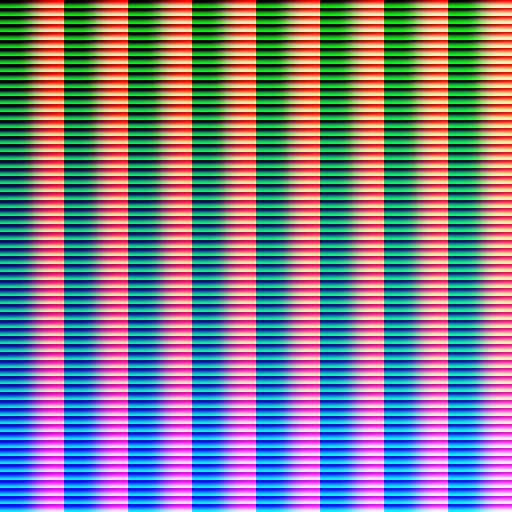

In [379]:
transformed_reshaped = np.array(transformed, dtype='uint8')
img = Image.fromarray(transformed_reshaped.reshape((512, 512, 3)))
img.save("/tmp/img1.png","PNG")
img